# Amazon Review Analysis: Part one - Scraping

Amazon has grown exponentially in the past decade. One of its more attractive features is it wide range of availably and speedy deliveries. Amazon utilizes multi-level e-commerce strategy that really sets it apart from their competitors. Amazon lets almost anyone sell on their platform. So how can businesses or your everyday people know that the items being purchased are of high quality? One way to vet a product is uses the reviews listed on the website.

In this analysis, we will scrape the reviews of different masks used during the panademic and see what insights we can learn from them. 

### Import Packages

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

### Set up User Agent

In order to scrape on many websites you need to identify your user agent in your code. This helps whatever website you are scraping identify who there and that you are not a robot. You need to list what type of computer you are using and the web brower. 

In [5]:
header = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'}

### EDA 

EDA - Exploratory Data Analysis. There is not much EDA to preform when scraping because this will be done on our saved dataset when we preform the actual analysis. However, it is important to know how the webpage you are scraping is set up. Most of the time, we will find the section we are looking for identify by a certain class. Once we identify the specific classes we are trying to mine/scrape, we can input them into our code.  


In [3]:
url = 'https://www.amazon.com/Black-Cloth-Face-Masks-Men/dp/B088TNF4T8/ref=sr_1_5?crid=1MAZTH2SL0A3F&keywords=covid+mask&qid=1662827354&sprefix=covid+mask%2Caps%2C108&sr=8-5'


### Request Get 

Now, we will make a request to get our webpage using the request package. We will also input the headers argument for identification. The get method from request returns can take several more parameters and you can organize your result even further. One import thing to note is about status codes. "The first bit of information that you can gather from Response is the status code. A status code informs you of the status of the request.

For example, a 200 OK status means that your request was successful, whereas a 404 NOT FOUND status means that the resource you were looking for was not found. There are many other possible status codes as well to give you specific insights into what happened with your request."[3]

We will see status codes more ofter later on in our project when we build our search functions. 

In [8]:

page_1 = requests.get(url,headers= header)

### BeautifulSoup


Now that we got our webpage. Let's look at the content and figure out where the reviews section is. Running the “page_1” webpage through Beautiful Soup gives us a BeautifulSoup object, which represents the document as a nested data structure.[2]

In [10]:
soup = BeautifulSoup(page_1.content, 'html.parser')

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
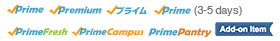

In [26]:
soup

There was a lot to search through there. But now we have the infomation we need to search, scrape, and build our dataset.

### Set Search Parameters

Our search query is set to 'covid-masks'. We will try to pull as many different mask options to compare with each other.

In [28]:
search_query = 'covid-masks'

cookie={} # insert request cookies within{}
def getAmazonSearch(search_query):
    url="https://www.amazon.in/s?k="+search_query
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

Next, we will define a function the will search for the specfic asin number for our products. 

"So, what is ASIN? The Amazon Standard Identification Number is a unique alphanumeric identifier that Amazon and its partner assign to products before listing them on the marketplace." [1]


In [29]:
def Searchasin(asin):
    url="https://www.amazon.in/dp/"+asin
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

This is a function concatenating the amazon url with our desired review link specific for each product and review

In [30]:
def Searchreviews(review_link):
    url="https://www.amazon.in"+review_link
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"


### Begin Scraping 

#### Product Names 

Now that we have created all the nesserary functions needed for our search on different mask one might buy to protect themseleves or others from COVID-19. 

We will first find all the product that come up when searching "covid mask". This particular class is 'a-size-base-plus a-color-base a-text-normal'. It does not have much meaning for us except that it is a tag that helps us pull the product names. 

In [31]:
product_names=[]
response=getAmazonSearch(search_query)
soup =BeautifulSoup(response.content)
for i in soup.findAll("span",{'class':'a-size-base-plus a-color-base a-text-normal'}): # the tag which is common for all the names of products
    product_names.append(i.text) #adding the product names to the list

https://www.amazon.in/s?k=covid-masks


In [32]:
product_names

['QUARANT 3 Ply Protective Surgical Face Mask, UV Sterilized, ISI, BIS, CE & ISO Certified, Melt Blown - SMMS Layer Fabric Disposable Masks with Adjustable Nose Pin (Blue, Pack of 100)',
 'ASGARD Nonwoven Fabric Disposable 3 Ply Surgical Mask (White, Without Valve, Pack of 100) for Unisex',
 'QUARANT 4 Ply Nanosilver Activated Carbon Surgical Face Mask, Self Sanitizing, ISO Certified, Meltblown Layer Fabric Disposable Masks with Adjustable Nose Pin(Grey, Unisex, Without Valve, Pack of 50)',
 'QUARANT 3 Ply Disposable Surgical Face Mask, UV Sterilized, ISI, BIS, CE & ISO Certified, ASTM Level 3, Meltblown Layer Fabric Masks with Adjustable Nose Pin (Blue, Pack of 100)',
 'N95 Face Mask for Unisex, (Pack of 10), Reusable and Washable, White, Made for COVID-19, ear-loop + aluminum nose pin, Without Valve',
 'TKCK-Copper Ultra Premium Comfortable Reusable & Washable Unisex Korea Imported Mask',
 'Yuga HexaShield 3D Reusable Washable Cotton Cloth Breathable Fabric Face Mask for Men and Wome

#### Data Asin 

Data Asin is the unique product identifier that Amazon uses. This will help us pull the specific product reviews. 

1. Extract the asin code from each product 
2. Concatenate the code to the amazon url to retrieve the appropriate products pages. 
3. Print at the told number of products recieved 

In [46]:
data_asin=[]
response=getAmazonSearch(search_query)
soup=BeautifulSoup(response.content)
for i in soup.findAll("div",{'data-component-type':'s-search-result'}):
    data_asin.append(i['data-asin'])

https://www.amazon.in/s?k=covid-masks


In [47]:
data_asin

['B095H3NYGW',
 'B091THQVT7',
 'B094T6L3SH',
 'B09523WDF3',
 'B095RYKHYW',
 'B091FS75DC',
 'B08D7JMQR9',
 'B096ZF7LQ1',
 'B08H11WW5T',
 'B0932XC5PN',
 'B09LVJ1SZZ',
 'B0936YJYYD',
 'B093Q7YH19',
 'B092H8QGWS',
 'B09643JHZG',
 'B08QDDKKPW',
 'B09N9RHLP7',
 'B08G1P2CRL',
 'B091G6TN8Q',
 'B09BJTZS87',
 'B09CCLZCRF',
 'B09GL69MXN',
 'B08BFYYVYR',
 'B08NK7CCNK',
 'B08NC7WMTN',
 'B08VNB23C9',
 'B0921457C5',
 'B09YQCCWBS',
 'B09NQFYTPD',
 'B08DCS12NJ',
 'B09P64XNYH',
 'B09G9T2DFB',
 'B09NQGXX5N',
 'B08KH7KS7P',
 'B098NDZKCQ',
 'B09T7FQFJ5',
 'B08G3RSHK5',
 'B09TFN9S4R',
 'B08DFWL2G6',
 'B08HWLJ55J',
 'B08S2T7XJC',
 'B08XBMR9MV',
 'B088NVPQRM',
 'B09PYYCZC9',
 'B09B3YP5DQ',
 'B09LVH4L16',
 'B094YQPL94',
 'B08X2PZP5V',
 'B09JZJ1QPY',
 'B08BTPGH8B',
 'B08GSGD6R8',
 'B09FGWCJC9',
 'B08NBYLJD4',
 'B08RNZ8C23',
 'B09N9X8J2K',
 'B08DFWRLW9',
 'B095H9VDQC',
 'B095H3GP5W',
 'B09J1FZVK5',
 'B096Y5N2H9']

In [49]:
link=[]
for i in range(len(data_asin)):
    response=Searchasin(data_asin[i])
    soup=BeautifulSoup(response.content)
    for i in soup.findAll("a",{'data-hook':"see-all-reviews-link-foot"}):
        link.append(i['href'])

https://www.amazon.in/dp/B095H3NYGW
https://www.amazon.in/dp/B091THQVT7
https://www.amazon.in/dp/B094T6L3SH
https://www.amazon.in/dp/B09523WDF3
https://www.amazon.in/dp/B095RYKHYW
https://www.amazon.in/dp/B091FS75DC
https://www.amazon.in/dp/B08D7JMQR9
https://www.amazon.in/dp/B096ZF7LQ1
https://www.amazon.in/dp/B08H11WW5T
https://www.amazon.in/dp/B0932XC5PN
https://www.amazon.in/dp/B09LVJ1SZZ
https://www.amazon.in/dp/B0936YJYYD
https://www.amazon.in/dp/B093Q7YH19
https://www.amazon.in/dp/B092H8QGWS
https://www.amazon.in/dp/B09643JHZG
https://www.amazon.in/dp/B08QDDKKPW
https://www.amazon.in/dp/B09N9RHLP7
https://www.amazon.in/dp/B08G1P2CRL
https://www.amazon.in/dp/B091G6TN8Q
https://www.amazon.in/dp/B09BJTZS87
https://www.amazon.in/dp/B09CCLZCRF
https://www.amazon.in/dp/B09GL69MXN
https://www.amazon.in/dp/B08BFYYVYR
https://www.amazon.in/dp/B08NK7CCNK
https://www.amazon.in/dp/B08NC7WMTN
https://www.amazon.in/dp/B08VNB23C9
https://www.amazon.in/dp/B0921457C5
https://www.amazon.in/dp/B09

In [50]:
len(link)

53

### Get Reviews 

Now we will iterate each URL through a for loop and set the range to how many reviews we want from each product. It is also important to have the link included in our list so we can compare products during our analysis. 

In [87]:
reviews=[]
for j in range(len(link)):
    for k in range(55):
        response=Searchreviews(link[j]+'&pageNumber='+str(k))
        soup=BeautifulSoup(response.content)
        for i in soup.findAll("span",{'data-hook':"review-body" }):
            reviews.append([i.text, link])
            
            


https://www.amazon.in/QUARANT-Ply-Protective-Face-Mask/product-reviews/B095H3NYGW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.in/QUARANT-Ply-Protective-Face-Mask/product-reviews/B095H3NYGW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/QUARANT-Ply-Protective-Face-Mask/product-reviews/B095H3NYGW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/QUARANT-Ply-Protective-Face-Mask/product-reviews/B095H3NYGW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/QUARANT-Ply-Protective-Face-Mask/product-reviews/B095H3NYGW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/QUARANT-Ply-Protective-Face-Mask/product-reviews/B095H3NYGW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.in/QUARANT-Ply-Protective-Face-Mask/product-r

#### Number of Review Retrieved

In [88]:
len(reviews)

5016

### Building the Dataset

The final step will be building our dataset. We will convet our list in a dataframe and save it locally to a csv file! 

In [101]:
review_data= pd.DataFrame(reviews, columns = [['reviews','product_link']]) #converting this dictionary into a dataframe

In [102]:
review_data.head()

,reviews,product_link
0,"\nOverall the masks are good, comfortable, sof...",[/QUARANT-Ply-Protective-Face-Mask/product-rev...
1,\ngood\n,[/QUARANT-Ply-Protective-Face-Mask/product-rev...
2,\nThe quality of this mask is good but not the...,[/QUARANT-Ply-Protective-Face-Mask/product-rev...
3,\nGood quality\n,[/QUARANT-Ply-Protective-Face-Mask/product-rev...
4,\nGood product\n,[/QUARANT-Ply-Protective-Face-Mask/product-rev...


In [103]:

review_data.shape

(5016, 2)

#### Save to CSV

In [1]:
review_data.to_csv('amazon_reviews.csv',index=False) #converting the dataframe to a csv file so as to use it later for further analysis

In [ ]:
# source: https://github.com/vaisakhnambiar/Web-scraping/blob/master/Amazon%20Scraping%20assignment.ipynb



In [105]:
url = ('https://www.tripadvisor.in/Hotels-g28932-Hawaii-Hotels.html')



def get_page_contents(url):
    page = requests.get(url, headers = header)
    return BeautifulSoup(page.text, 'html.parser')

soup = get_page_contents(url)

Source 

1. -https://www.sellzone.com/blog/amazon-asin-number-what-is-it-and-how-to-get-it/#:~:text=So%2C%20what%20is%20ASIN%3F,code%20attached%20to%20every%20item.
2. https://www.crummy.com/software/BeautifulSoup/bs4/doc/
